<a href="https://colab.research.google.com/github/pukerpanda/Streamlit_tutorial_app/blob/main/NeMo_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
BRANCH = 'r1.23.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@r1.23.0#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/NVIDIA/NeMo.git (to revision r1.23.0) to /tmp/pip-install-zrqfs3d5/nemo-toolkit_f352bbf5d4574359bb13f0930773a666
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-zrqfs3d5/nemo-toolkit_f352bbf5d4574359bb13f0930773a666
  Running command git checkout -b r1.23.0 --track origin/r1.23.0
  Switched to a new branch 'r1.23.0'
  Branch 'r1.23.0' set up to track remote branch 'r1.23.0' from 'origin'.
  Resolved https://github.com/NVIDIA/NeMo.git to commit e772dbf53145a7b45f13440cf6e0ef51035f80dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prepa

In [2]:
try:
    from nemo_text_processing.text_normalization.normalize import Normalizer
except ModuleNotFoundError:
    raise ModuleNotFoundError(
        "The package `nemo_text_processing` was not installed in this environment. Please refer to"
        " https://github.com/NVIDIA/NeMo-text-processing and install this package before using "
        "this script"
    )

text_normalizer = Normalizer(input_case="cased", lang="en")

 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.


In [4]:
text = "Mr. Johnson is turning 35 years old on 04-15-2023."
normalized_text = text_normalizer.normalize(text)

print(text)
print(normalized_text)

Mr. Johnson is turning 35 years old on 04-15-2023.
mister Johnson is turning thirty five years old on april fifteenth twenty twenty three.


In [9]:
!git clone https://github.com/NVIDIA/NeMo.git


Cloning into 'NeMo'...
remote: Enumerating objects: 150810, done.
remote: Counting objects: 100% (3481/3481), done.
remote: Compressing objects: 100% (1639/1639), done.
remote: Total 150810 (delta 2264), reused 2722 (delta 1732), pack-reused 147329
Receiving objects: 100% (150810/150810), 245.14 MiB | 29.52 MiB/s, done.
Resolving deltas: 100% (113098/113098), done.


In [10]:
%cd NeMo


/content/NeMo


In [11]:
import os
from nemo.collections.tts.g2p.models.en_us_arpabet import EnglishG2p
from nemo.collections.tts.g2p.models.i18n_ipa import IpaG2p

NEMO_DIR = "/content/NeMo"

ipa_dict_path = os.path.join(NEMO_DIR, "scripts", "tts_dataset_files", "ipa_cmudict-0.7b_nv23.01.txt")

# EnglishG2p uses the CMU dictionary by default, if none is provided
arpabet_g2p = EnglishG2p()
ipa_g2p = IpaG2p(phoneme_dict=ipa_dict_path)

[NeMo E 2024-03-27 13:08:28 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2024-03-27 13:08:28 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2024-03-27 13:08:29 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-

In [12]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

Hello world
['h', 'e', 'l', 'l', 'o', ' ', 'W', 'ER1', 'L', 'D']
['H', 'E', 'L', 'L', 'O', ' ', 'ˈ', 'w', 'ɝ', 'l', 'd']


In [13]:
print(arpabet_g2p.phoneme_dict['hello'])

[['HH', 'AH0', 'L', 'OW1'], ['HH', 'EH0', 'L', 'OW1']]


In [14]:
arpabet_g2p = EnglishG2p(ignore_ambiguous_words=False)
ipa_g2p = IpaG2p(phoneme_dict=ipa_dict_path, ignore_ambiguous_words=False)

[NeMo E 2024-03-27 13:21:02 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2024-03-27 13:21:02 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2024-03-27 13:21:04 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-

In [15]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

Hello world
['HH', 'AH0', 'L', 'OW1', ' ', 'W', 'ER1', 'L', 'D']
['h', 'ə', 'ˈ', 'l', 'o', 'ʊ', ' ', 'ˈ', 'w', 'ɝ', 'l', 'd']


In [16]:
from nemo.collections.tts.torch.tts_tokenizers import EnglishPhonemesTokenizer, IPATokenizer

arpabet_tokenizer = EnglishPhonemesTokenizer(arpabet_g2p)
ipa_tokenizer = IPATokenizer(ipa_g2p)

[NeMo W 2024-03-27 13:21:40 experimental:26] `<class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'>` is experimental and not ready for production yet. Use at your own risk.


In [17]:
text = "Hello world"
arpabet_tokens = arpabet_tokenizer(text)
ipa_tokens = ipa_tokenizer(text)

print(text)
print(arpabet_tokens)
print(ipa_tokens)

Hello world
[7, 27, 10, 36, 0, 21, 32, 10, 3]
[18, 40, 51, 22, 25, 48, 54, 51, 31, 43, 22, 15]


In [18]:
import torch
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder

# List pretrained models available in NeMo
print("Spectrogram Models")
print(SpectrogramGenerator.list_available_models())

print()
print("Vocoders")
print(Vocoder.list_available_models())

Spectrogram Models
[PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is ARPABET-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_ipa,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is IPA-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/IPA_1.13.0/files/tts_en_fastpitch_align_ipa.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_multispeaker,
	description=This model is trained o

In [19]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

# Load our spectrogram and vocoder models onto our CPU
spectrogram_model = SpectrogramGenerator.from_pretrained("tts_en_tacotron2").eval().to(device)
vocoder = Vocoder.from_pretrained("tts_en_hifigan").eval().to(device)

[NeMo I 2024-03-27 13:24:48 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.10.0/files/tts_en_tacotron2.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2024-03-27 13:24:55 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-03-27 13:25:42 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-03-27 13:25:42 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sample_rate: 22050
      sup_data_path: null
      sup_data_types: null
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowf

[NeMo I 2024-03-27 13:25:42 features:289] PADDING: 16
[NeMo I 2024-03-27 13:25:42 features:297] STFT using exact pad
[NeMo I 2024-03-27 13:25:43 save_restore_connector:249] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2024-03-27 13:25:43 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2024-03-27 13:25:56 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-03-27 13:25:59 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-03-27 13:25:59 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-03-27 13:25:59 features:289] PADDING: 0


[NeMo W 2024-03-27 13:25:59 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-03-27 13:25:59 features:289] PADDING: 0


[NeMo W 2024-03-27 13:25:59 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
      warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
    


[NeMo I 2024-03-27 13:26:01 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [20]:
text = "This audio was generated with a text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [21]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

"This audio was generated with a text-to-speech model."



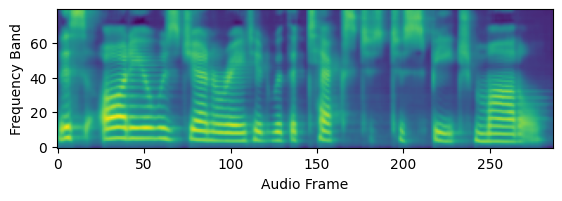

In [22]:
# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

In [23]:
import torch
from nemo.collections.tts.models import Tacotron2Model

Tacotron2Model.list_available_models()

[PretrainedModelInfo(
 	pretrained_model_name=tts_en_tacotron2,
 	description=This model is trained on LJSpeech sampled at 22050Hz, and can be used to generate female English voices with an American accent.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.10.0/files/tts_en_tacotron2.nemo,
 	class_=<class 'nemo.collections.tts.models.tacotron2.Tacotron2Model'>
 )]

In [24]:
tacotron2_model = Tacotron2Model.from_pretrained("tts_en_tacotron2").eval().to(device)
tacotron2_model.calculate_loss = False

g2p = EnglishG2p(ignore_ambiguous_words=False)

[NeMo I 2024-03-27 13:26:37 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2024-03-27 13:26:37 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2024-03-27 13:26:37 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-03-27 13:27:28 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-03-27 13:27:28 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sample_rate: 22050
      sup_data_path: null
      sup_data_types: null
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowf

[NeMo I 2024-03-27 13:27:28 features:289] PADDING: 16
[NeMo I 2024-03-27 13:27:28 features:297] STFT using exact pad
[NeMo I 2024-03-27 13:27:28 save_restore_connector:249] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.


[NeMo E 2024-03-27 13:27:28 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2024-03-27 13:27:28 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2024-03-27 13:27:30 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.


In [25]:
text = "This is an attention map."

tokens = tacotron2_model.parse(text, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=spectrogram_model.device)

_, _, _, alignments, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
alignment = alignments[0].cpu().detach().numpy()

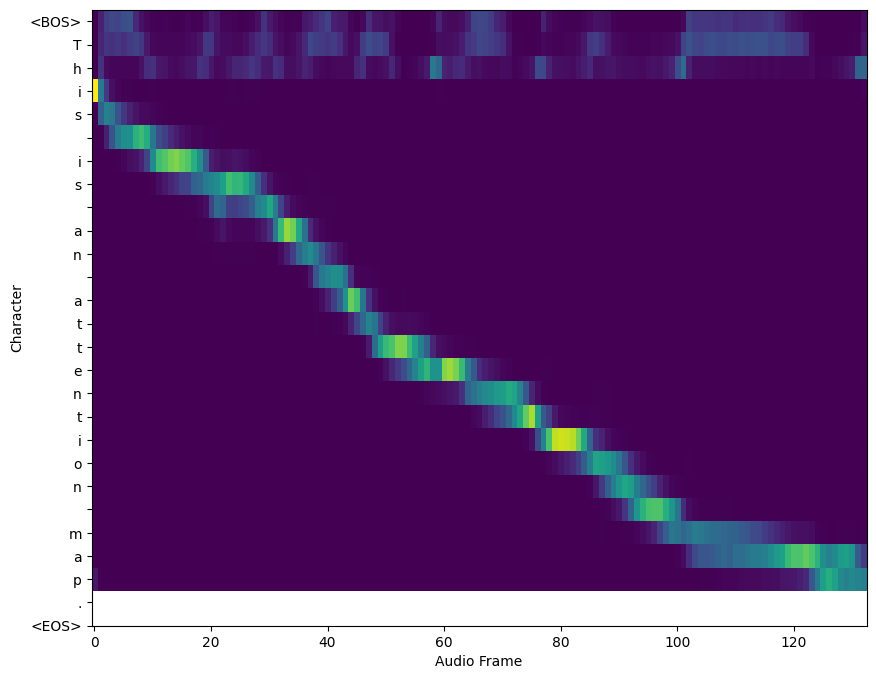

In [26]:
# Pretrained Tacotron 2 uses grapheme input with beginning-of-speech and end-of-speech tokens
characters = ["<BOS>"] + [char for char in text] + ["<EOS>"]

fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel("Audio Frame")
plt.ylabel("Character")
_ = ax.imshow(alignment.transpose(), origin='upper', aspect='auto')
_ = ax.set_yticks(range(len(characters)))
_ = ax.set_yticklabels(characters)

In [27]:
import wget

audio_path = "LJ023-0089.wav"
audio_url = "https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav"

if not os.path.exists(audio_path):
  wget.download(audio_url, audio_path)

In [28]:
import librosa

# Process text input
text = "That is not only my accusation."

tokens = tacotron2_model.parse(text, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=tacotron2_model.device)

# Run regular inference
_, predicted_spectrogram, _, _, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
predicted_audio = vocoder.convert_spectrogram_to_audio(spec=predicted_spectrogram)
predicted_audio = predicted_audio.cpu().detach().numpy()[0]

# Process the ground truth audio
sample_rate = 22050
audio, _ = librosa.load(audio_path, sr=sample_rate)

audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(tacotron2_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=tacotron2_model.device).unsqueeze(0)

# Run GTA inference. This is a bit awkward to set up as Tacotron2 only expects to do this at training time.
tacotron2_model.calculate_loss = True
tacotron2_model.training = True
tacotron2_model.decoder.training = True
_, gta_spectrogram, _, _, _, _ = tacotron2_model.forward(
    tokens=tokens,
    token_len=token_len,
    audio=audio_tensor,
    audio_len=audio_len
)
tacotron2_model.calculate_loss = False
tacotron2_model.training = False
tacotron2_model.decoder.training = False

gta_audio = vocoder.convert_spectrogram_to_audio(spec=gta_spectrogram)
gta_audio = gta_audio.cpu().detach().numpy()[0]

In [29]:
print(f'"{text}"\n')

print("Original Audio")
ipd.display(ipd.Audio(audio, rate=sample_rate))

print("GTA Audio")
ipd.display(ipd.Audio(gta_audio, rate=sample_rate))

print("Predicted Audio")
ipd.display(ipd.Audio(predicted_audio, rate=sample_rate))

"That is not only my accusation."

Original Audio


GTA Audio


Predicted Audio


In [30]:
from nemo.collections.tts.models import FastPitchModel

fastpitch_model = FastPitchModel.from_pretrained("tts_en_fastpitch").eval().to(device)

[NeMo I 2024-03-27 13:28:13 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2024-03-27 13:28:20 common:924] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-03-27 13:29:08 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-03-27 13:29:08 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
  

[NeMo I 2024-03-27 13:29:08 features:289] PADDING: 1
[NeMo I 2024-03-27 13:29:09 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.


In [31]:
text = "This audio was generated with the fastpitch text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = fastpitch_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [32]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

"This audio was generated with the fastpitch text-to-speech model."



In [33]:
# Compute real spectrogram
audio_path = "LJ023-0089.wav"
sample_rate = 22050

audio, _ = librosa.load(audio_path, sr=sample_rate)
audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(fastpitch_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=fastpitch_model.device).unsqueeze(0)

real_spectrogram, _ = fastpitch_model.preprocessor(input_signal=audio_tensor, length=audio_len)
real_spectrogram = real_spectrogram.cpu().detach().numpy()[0]

# Run FastPitch inference
text = "That is not only my accusation."

tokens = fastpitch_model.parse(text, normalize=True)
predicted_spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)
predicted_spectrogram = predicted_spectrogram.cpu().detach().numpy()[0]

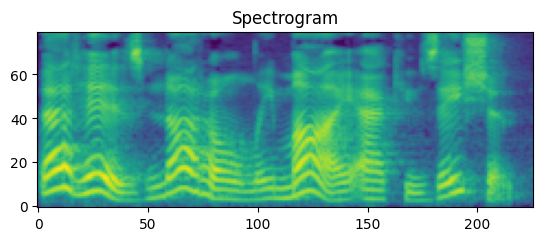

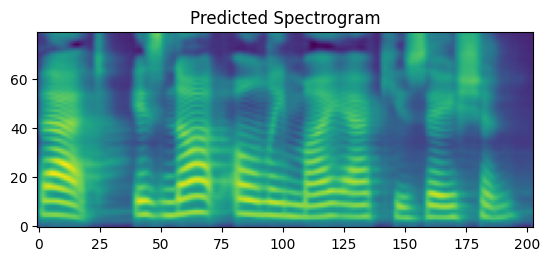

In [34]:
# Compare the spectrograms
imshow(real_spectrogram, origin="lower")
plt.title("Spectrogram")
plt.show()

imshow(predicted_spectrogram, origin="lower")
plt.title("Predicted Spectrogram")
plt.show()

In [35]:
audio_path = "LJ023-0089.wav"

# Process the ground truth audio
sample_rate = 22050
audio, _ = librosa.load(audio_path, sr=sample_rate)

audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(tacotron2_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=tacotron2_model.device).unsqueeze(0)

# Extract the spectrogram using the FastPitch audio preprocessor
spectrogram, spectrogram_len = fastpitch_model.preprocessor(input_signal=audio_tensor, length=audio_len)

# Invert the spectrogram
reconstructed_audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
reconstructed_audio = reconstructed_audio.cpu().detach().numpy()[0]

In [36]:
print("Original Audio")
ipd.display(ipd.Audio(audio, rate=sample_rate))

print("Reconstructed Audio")
ipd.display(ipd.Audio(reconstructed_audio, rate=sample_rate))

Original Audio


Reconstructed Audio
